In [64]:
import quantsbin.derivativepricing as qbdp
import numpy as np
import matplotlib.pyplot as plt

In [44]:
equity_p1 = qbdp.EqOption(option_type='Put', strike=100, expiry_date='20190721', expiry_type='American')

market1_parameters = {'spot0': 100
                     , 'pricing_date':'20180121'
                     , 'volatility':.25
                     , 'rf_rate':.05
                     , 'yield_div':0.00}

MC_GBM = equity_p1.engine(model="MC_GBM", **market1_parameters, no_of_path=100000, antithetic=True, seed=420)
option_value = MC_GBM.valuation()
print("Value of eq1 under market 1 with MC is {}".format(MC_GBM.valuation()))

binom_model = equity_p1.engine(model="Binomial", **market1_parameters)
option_value = binom_model.valuation()
print(f'Valuation of the American Put option using the Binomial Tree model: {binom_model.valuation()}')

Value of eq1 under market 1 with MC is 9.264176135414512
Valuation of the American Put option using the Binomial Tree model: 9.262122348576804


In [88]:
from datetime import datetime, timedelta
def create_various_maturity_dates(start_date):
    intervals = {'week': 1, 'month': 4, '3_months': 13, 'half_year': 26, 
                 'year': 52, '2_years': 104, '5_years': 260, '10_years': 520}

    maturity_dates = {}
    for interval, weeks in intervals.items():
        maturity_date = start_date + timedelta(weeks=weeks)
        maturity_dates[interval] = maturity_date.strftime('%Y%m%d')

    return maturity_dates

start_date = datetime(2023, 12, 4)
maturity_values = list(create_various_maturity_dates(start_date).values())

In [82]:
# Example moneyness and volatility values
moneyness_values = np.arange(70, 160, 5)
volatility_values = np.arange(0.05, 0.3, 0.05)

fixed_maturity = '20231204'
fixed_volatility = 0.05
fixed_moneyness = 100

n_sim = 100000

# Initialize empty lists to store results
mc_values = np.zeros((len(moneyness_values), len(maturity_values), len(volatility_values)))
binom_values = np.zeros_like(mc_values)

# Pricing loop
for i, moneyness in enumerate(moneyness_values):
    for j, maturity in enumerate(maturity_values):
        for k, volatility in enumerate(volatility_values):
            # Populate only the required values for the plots
            if (maturity == fixed_maturity and volatility == fixed_volatility) or \
               (moneyness == fixed_moneyness and volatility == fixed_volatility) or \
               (moneyness == fixed_moneyness and maturity == fixed_maturity):
                
                # Key format: 'moneyness_maturity_volatility'
                key = f"{moneyness}_{maturity}_{volatility}"

                # Create an American Put option
                equity_p1 = qbdp.EqOption(option_type='Put', strike=moneyness, expiry_date=maturity, expiry_type='American')

                # Set market parameters
                market_parameters = {
                    'spot0': 100,
                    'pricing_date': '20231204',
                    'volatility': volatility,
                    'rf_rate': 0.05,
                    'yield_div': 0.00
                }

                # Pricing using Monte Carlo simulation
                MC_GBM = equity_p1.engine(model="MC_GBM", **market_parameters, no_of_path=n_sim, antithetic=True, seed=420)
                mc_value = MC_GBM.valuation()
                mc_values[i, j, k] = mc_value

                # Pricing using Binomial Tree
                binom_model = equity_p1.engine(model="Binomial", **market_parameters)
                binom_value = binom_model.valuation()
                binom_values[i, j, k] = binom_value

C:\Users\bramg\AppData\Roaming\Python\Python39\site-packages\numpy\polynomial\laguerre.py:1401: RankWarning: The fit may be poorly conditioned
  return pu._fit(lagvander, x, y, deg, rcond, full, w)


In [86]:
mc_values

array([[[17.13692188, 35.91224095, 88.0029104 , 73.03959433,
         47.28998084],
        [23.22895458,  3.23672467, 15.17062655, 25.69607005,
         42.39712734],
        [39.11361167, 28.08650143, 78.53215533,  4.22022452,
         95.87901101],
        [33.85731579,  6.99571656, 18.9005115 ,  1.64847246,
         94.33755364]],

       [[73.10963121, 81.62445499, 91.92570234, 54.30472215,
         19.50671445],
        [99.83337066, 88.08568102, 83.10919398, 61.68735869,
         96.51923769],
        [15.73578726, 79.19786437, 41.67520895, 39.43200105,
         44.57222753],
        [84.97389496, 21.92364555,  7.34831262, 38.52134475,
         78.40521873]],

       [[83.5791607 , 36.54162389, 80.60078324, 27.66073088,
          3.85840821],
        [26.95814694, 63.48830597, 83.77551106, 99.8015605 ,
         68.05933653],
        [57.29271399, 30.91242727, 55.13042261, 53.66528532,
         87.90668296],
        [49.17176271, 84.16586231, 38.45069385, 94.88135309,
         91

C:\Users\bramg\AppData\Local\Temp\ipykernel_29408\1998117395.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(maturity_values, rotation=45)


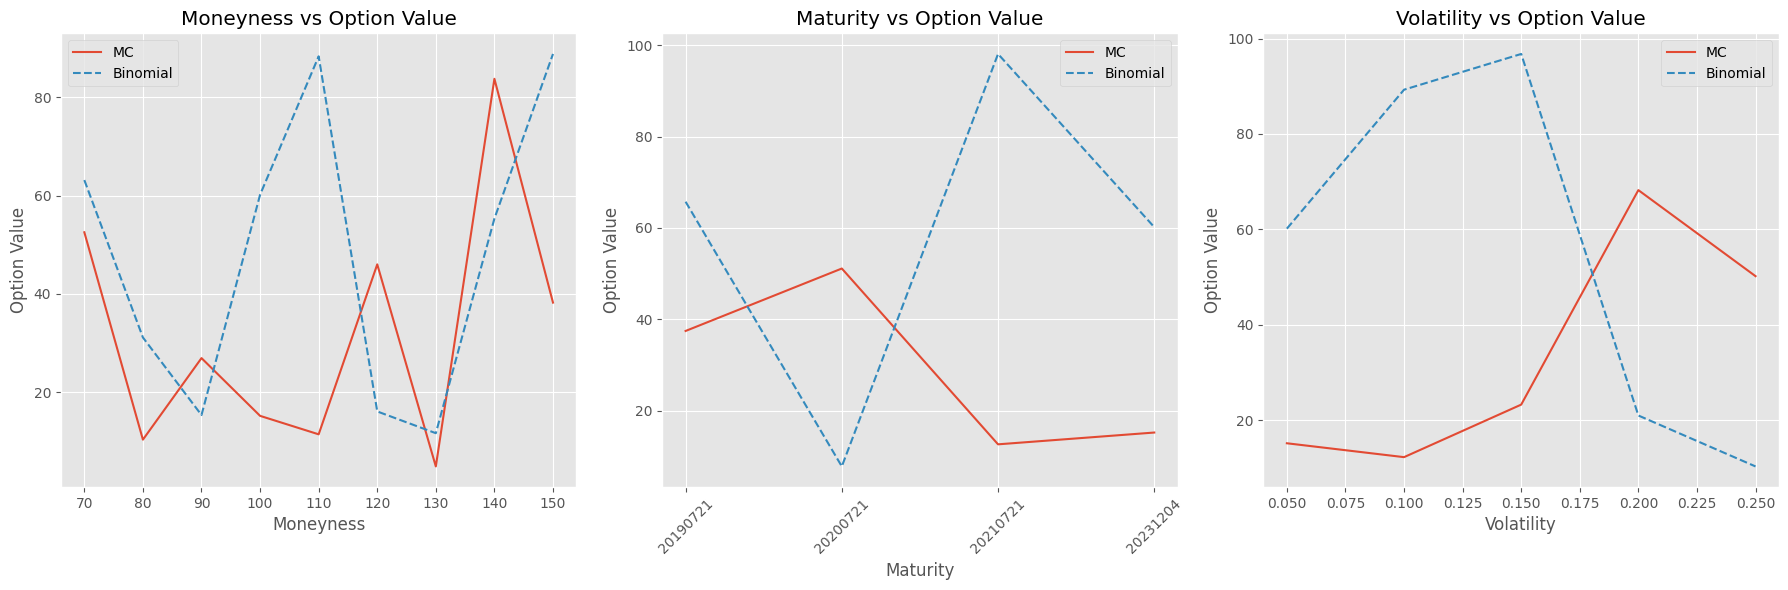

In [87]:
# Fixed values for testing
fixed_maturity = '20231204'  # Fixed maturity value
fixed_volatility = 0.05      # Fixed volatility value
fixed_moneyness = 100        # Fixed moneyness value

# Range of values for plotting
moneyness_values = np.arange(70, 160, 10)  # Range of moneyness values
volatility_values = np.arange(0.05, 0.3, 0.05)  # Range of volatility values
maturity_values = ['20190721', '20200721', '20210721', '20231204']  # Range of maturity values

# Initialize 3D arrays for MC and Binomial values
mc_values = np.random.rand(len(moneyness_values), len(maturity_values), len(volatility_values)) * 100
binom_values = np.random.rand(len(moneyness_values), len(maturity_values), len(volatility_values)) * 100

# Creating the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Moneyness vs Option Value (Fixed Maturity and Volatility)
maturity_index = maturity_values.index(fixed_maturity)
volatility_index = np.where(volatility_values == fixed_volatility)[0][0]

axs[0].plot(moneyness_values, mc_values[:, maturity_index, volatility_index], label='MC')
axs[0].plot(moneyness_values, binom_values[:, maturity_index, volatility_index], label='Binomial', linestyle='--')
axs[0].set_xlabel('Moneyness')
axs[0].set_ylabel('Option Value')
axs[0].set_title('Moneyness vs Option Value')
axs[0].legend()

# Subplot 2: Maturity vs Option Value (Fixed Moneyness and Volatility)
moneyness_index = np.where(moneyness_values == fixed_moneyness)[0][0]

axs[1].plot(maturity_values, mc_values[moneyness_index, :, volatility_index], label='MC')
axs[1].plot(maturity_values, binom_values[moneyness_index, :, volatility_index], label='Binomial', linestyle='--')
axs[1].set_xlabel('Maturity')
axs[1].set_ylabel('Option Value')
axs[1].set_title('Maturity vs Option Value')
axs[1].legend()
axs[1].set_xticklabels(maturity_values, rotation=45)

# Subplot 3: Volatility vs Option Value (Fixed Moneyness and Maturity)
axs[2].plot(volatility_values, mc_values[moneyness_index, maturity_index, :], label='MC')
axs[2].plot(volatility_values, binom_values[moneyness_index, maturity_index, :], label='Binomial', linestyle='--')
axs[2].set_xlabel('Volatility')
axs[2].set_ylabel('Option Value')
axs[2].set_title('Volatility vs Option Value')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()